In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # For checking current working directory if needed for paths

In [4]:
%pip install seaborn
import seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Set a style for plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size for plots

In [7]:
# --- Load the Dataset ---
# Assuming the dataset is in the same directory as this script
try:
    df = pd.read_csv(r'C:\Users\Shib\Documents\10acadamy\Credit Risk Model Building, Deploying, and Automating\Data\data.csv')
    df_var_definitions = pd.read_csv(r'C:\Users\Shib\Documents\10acadamy\Credit Risk Model Building, Deploying, and Automating\Data\Xente_Variable_Definitions.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset files not found.")
    print("Please ensure 'data.csv' and 'Xente_Variable_Definitions.csv' are in the 'data/raw/' directory.")
    print(f"Current working directory: {os.getcwd()}")
    print("Expected path for data.csv:", os.path.abspath(os.path.join(os.getcwd(), '../data/raw/data.csv')))
# Display a brief overview to confirm loading
print("\nFirst 5 rows of the main dataset:")
print(df.head())

print("\nVariable Definitions (first 5 rows):")
print(df_var_definitions.head())

Data loaded successfully!

First 5 rows of the main dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      P

1. overview of the data and
2. Summary Statistics

In [ ]:

# Get DataFrame Information
# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"The main dataset has {num_rows} rows and {num_cols} columns.")

# Get a concise summary of the DataFrame, including data types and non-null values
print("\n--- DataFrame Information ---")
df.info()

print("\n--- Variable Definitions Information ---")
df_var_definitions.info()


# This section provides statistical summaries for numerical features and value counts for categorical features,
# offering insights into central tendency, dispersion, and the frequency of categories.

# Summary Statistics for Numerical and Categorical Features
# --- Summary Statistics for Numerical Features ---
print("\n--- Summary Statistics for Numerical Features ---")
print(df.describe())

# --- Summary Statistics for Categorical Features ---
print("\n--- Value Counts for Key Categorical Features ---")
# Loop through some interesting categorical columns to see their unique values and counts
categorical_cols_for_summary = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy']

for col in categorical_cols_for_summary:
    if col in df.columns:
        print(f"\nValue Counts for '{col}':")
        print(df[col].value_counts())
        print(f"Number of unique {col}: {df[col].nunique()}")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Also check FraudResult distribution - this is critical for our target variable
print("\nValue Counts for 'FraudResult':")
print(df['FraudResult'].value_counts())
print(f"Fraud Rate: {df['FraudResult'].mean() * 100:.2f}%")

The main dataset has 95662 rows and 16 columns.

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  obje

# Markdown Cell: Observations from Summary Statistics
# ### Observations from Summary Statistics:
# * **Numerical Features (`Amount`, `Value`):**
#     * `Amount` has a minimum value of `[INSERT MIN AMOUNT]`, indicating there are negative transactions (credits). This is an important distinction from `Value` which is the absolute value.
#     * `Value` has a minimum of `[INSERT MIN VALUE]` and shows very high maximum values, suggesting the presence of large transactions or potential outliers. The mean and median (50th percentile) are significantly different, hinting at a skewed distribution.
# * **Categorical Features:**
#     * `CurrencyCode` is predominantly `[INSERT MOST COMMON CURRENCY]`, with other currencies appearing less frequently.
#     * `ProductCategory` shows `[INSERT NUMBER]` unique categories, with `[MOST COMMON CATEGORY]` being the most common.
#     * `ChannelId` has `[INSERT NUMBER]` unique channels. `[MOST COMMON CHANNEL]` is the primary channel used.
#     * `CountryCode` currently appears as a number, but `df.info()` shows it as `int64`. We should verify if it truly represents a country code that could be converted to a meaningful categorical feature later if needed, or if it's just an identifier. (Note: The variable definitions state it's a "numerical geographical code representing the country").
# * **`FraudResult` Imbalance:** The `FraudResult` column is highly imbalanced. Only `[INSERT PERCENTAGE]` of transactions are flagged as fraudulent (`1`), while the vast majority are legitimate (`0`). This significant imbalance is a common characteristic of fraud detection datasets and will need careful consideration during model training and evaluation (e.g., using resampling techniques or specific metrics like Precision, Recall, F1-score).


3. Distribution of Numerical Features


--- Distribution of Numerical Features ---


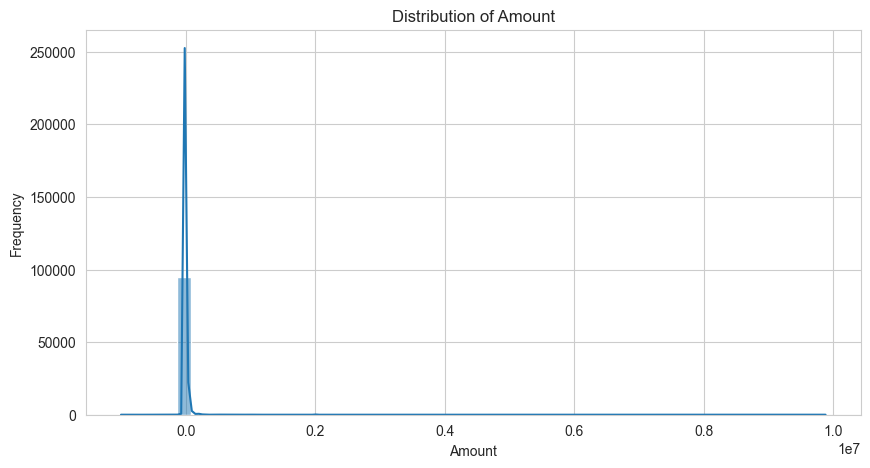

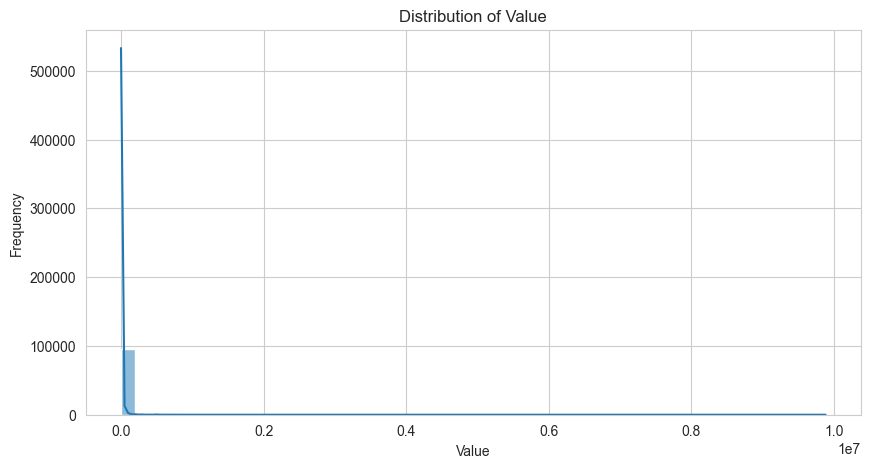

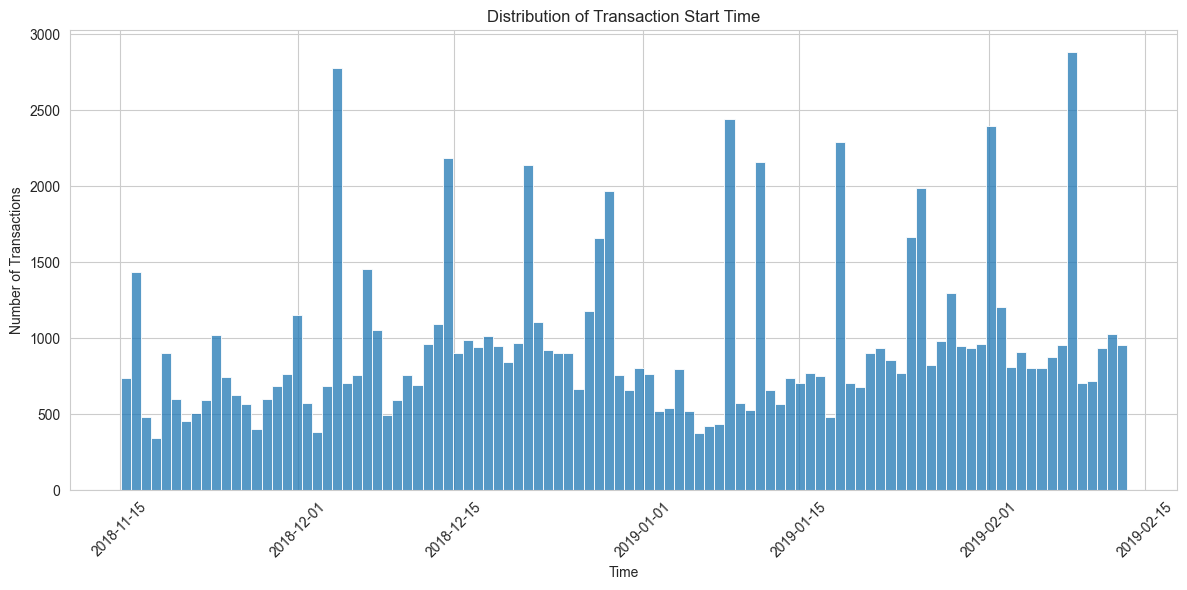

In [10]:
#Visualize Distribution of Numerical Features
# Convert 'TransactionStartTime' to datetime for time-based analysis
df['TransactionStartTime_dt'] = pd.to_datetime(df['TransactionStartTime'])

# List of numerical columns to visualize (excluding simple IDs)
numerical_cols_to_plot = ['Amount', 'Value'] # Add other numerical features if you find them in df.info()

print("\n--- Distribution of Numerical Features ---")
for col in numerical_cols_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=50) # kde=True adds a smoothed density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize distribution of TransactionStartTime (temporal patterns)
plt.figure(figsize=(12, 6))
sns.histplot(df['TransactionStartTime_dt'], bins=100) # Use many bins to see temporal distribution
plt.title('Distribution of Transaction Start Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations from Numerical Feature Distributions
# ### Observations from Numerical Feature Distributions:
# * **`Amount` and `Value`:** Both distributions are heavily **right-skewed**, with a large concentration of transactions at lower values. The tail extends significantly towards higher values, confirming the presence of large transactions and potential outliers.
#     * The `Amount` distribution clearly shows values both above and below zero, reflecting debits and credits, while `Value` focuses only on the magnitude.
# * **`TransactionStartTime`:** The distribution of transaction start times can reveal patterns such as peak transaction hours/days/months. `[OBSERVE ANY SEASONAL, DAILY, OR HOURLY PATTERNS HERE, e.g., higher activity at month-end, or during specific business hours]`. This temporal information can be highly valuable for feature engineering.

# ---

4. Distribution of Categorical Features


--- Distribution of Categorical Features ---


C:\Users\Shib\AppData\Local\Temp\ipykernel_7848\1914168319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


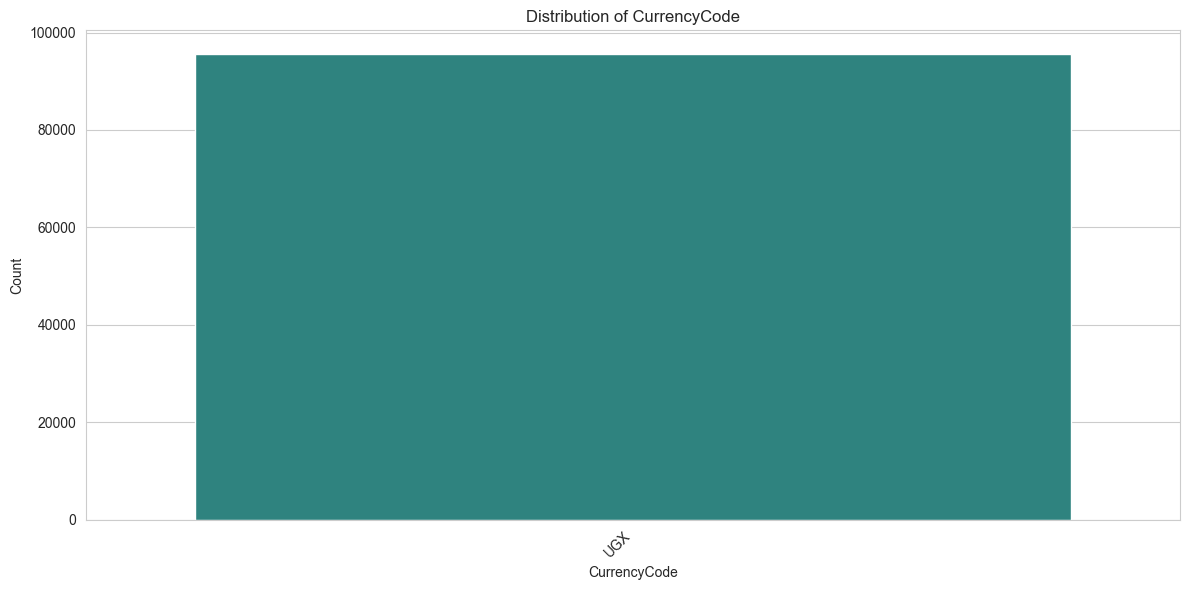

C:\Users\Shib\AppData\Local\Temp\ipykernel_7848\1914168319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


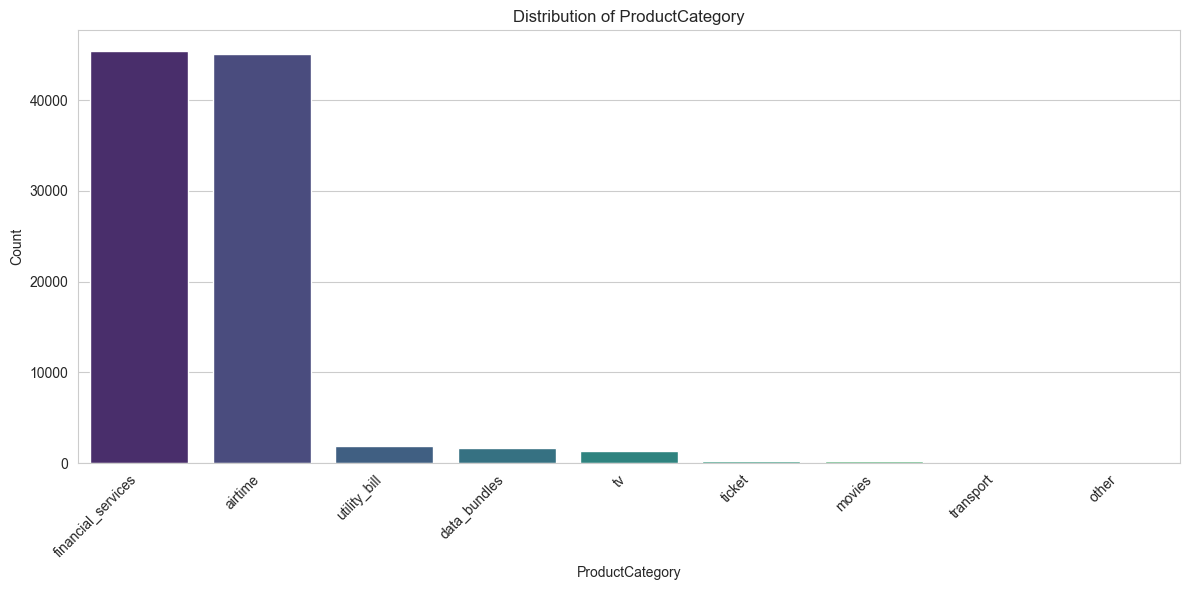

C:\Users\Shib\AppData\Local\Temp\ipykernel_7848\1914168319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


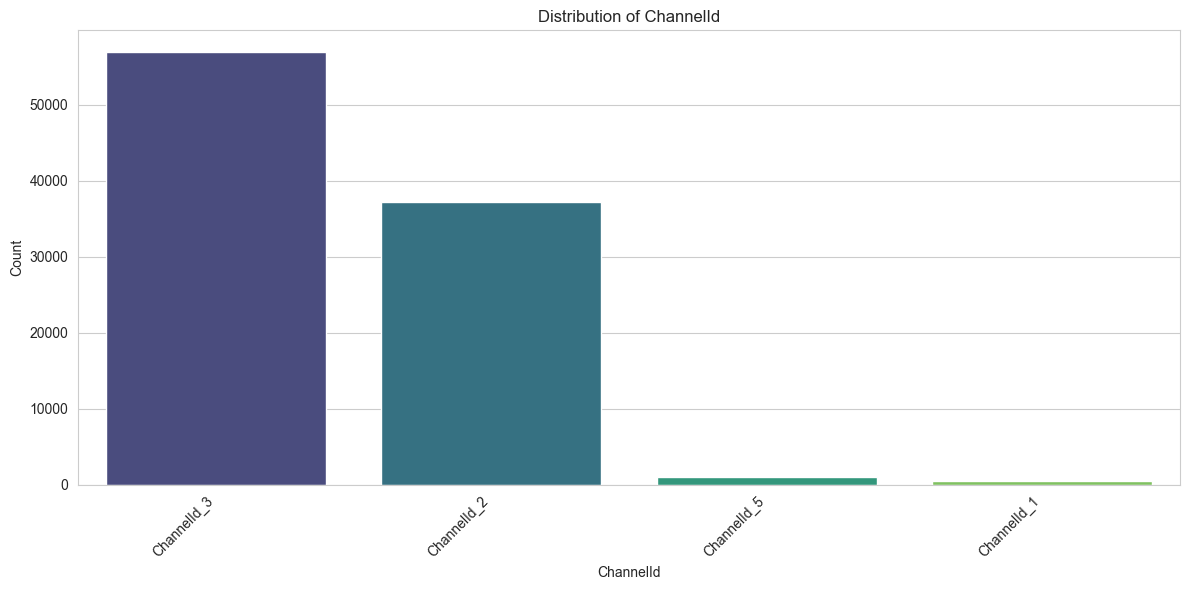

C:\Users\Shib\AppData\Local\Temp\ipykernel_7848\1914168319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


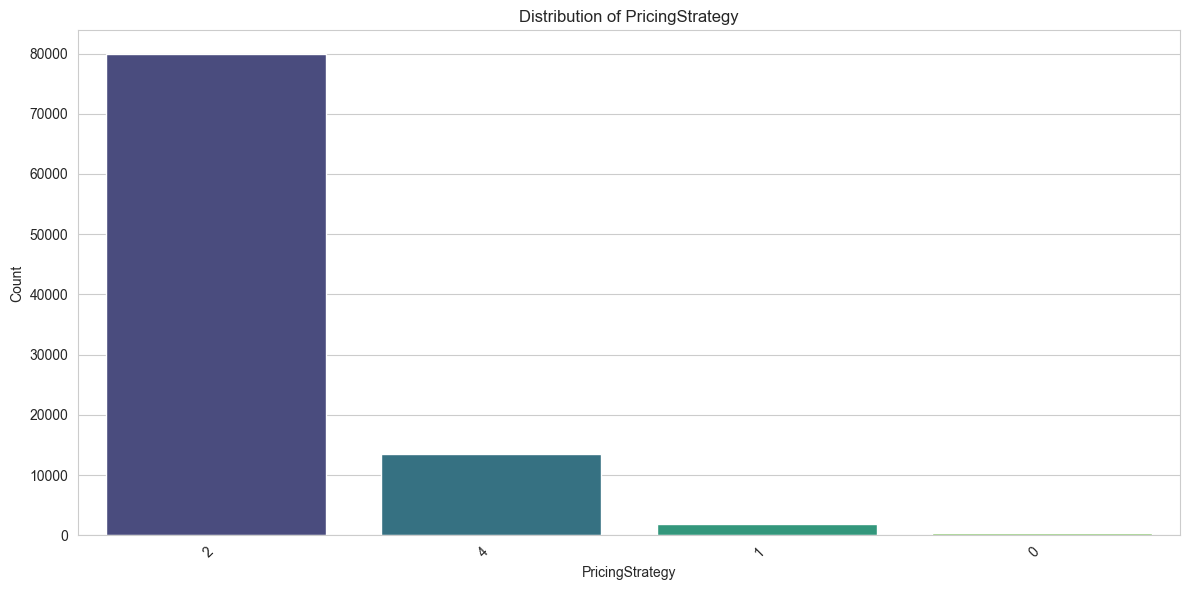

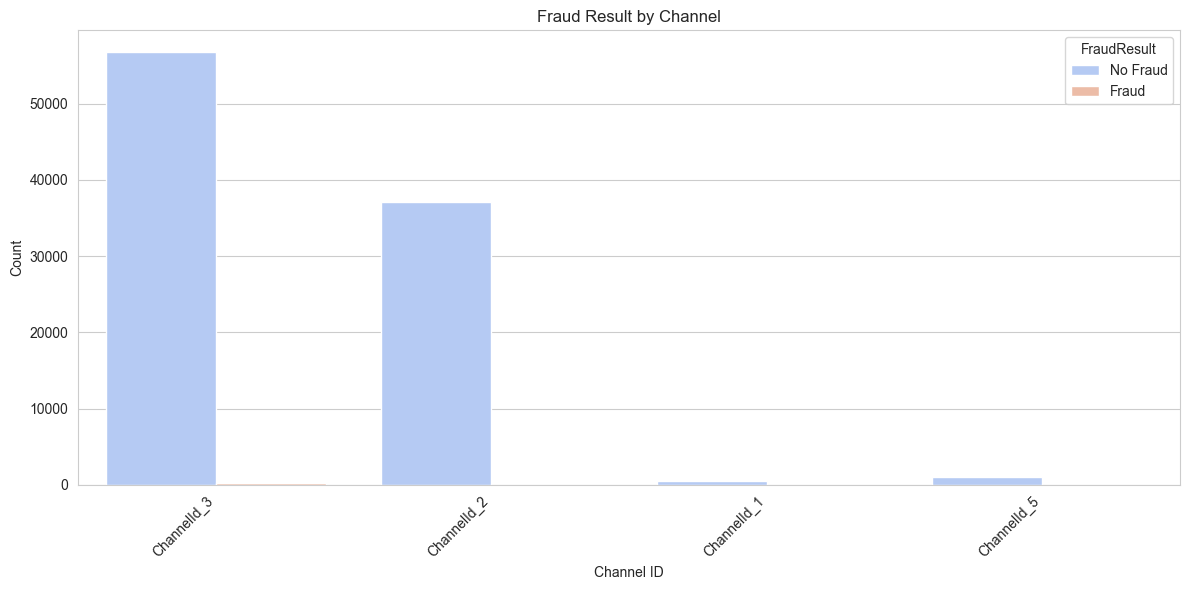

In [11]:
categorical_cols_to_plot = ['CurrencyCode', 'ProductCategory', 'ChannelId', 'PricingStrategy'] # Add others if relevant

print("\n--- Distribution of Categorical Features ---")
for col in categorical_cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        # Use value_counts().index to order bars from most to least frequent
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
        plt.tight_layout() # Adjust layout to prevent labels from being cut off
        plt.show()
    else:
        print(f"Column '{col}' not found for plotting.")

# Special attention to FraudResult vs. a key categorical variable like ChannelId
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ChannelId', hue='FraudResult', palette='coolwarm')
plt.title('Fraud Result by Channel')
plt.xlabel('Channel ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='FraudResult', labels=['No Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

5. Correlation Analysis


--- Correlation Analysis of Numerical Features ---

Correlation Matrix:
                   Amount     Value  PricingStrategy  FraudResult
Amount           1.000000  0.989692        -0.061931     0.557370
Value            0.989692  1.000000        -0.017020     0.566739
PricingStrategy -0.061931 -0.017020         1.000000    -0.033821
FraudResult      0.557370  0.566739        -0.033821     1.000000


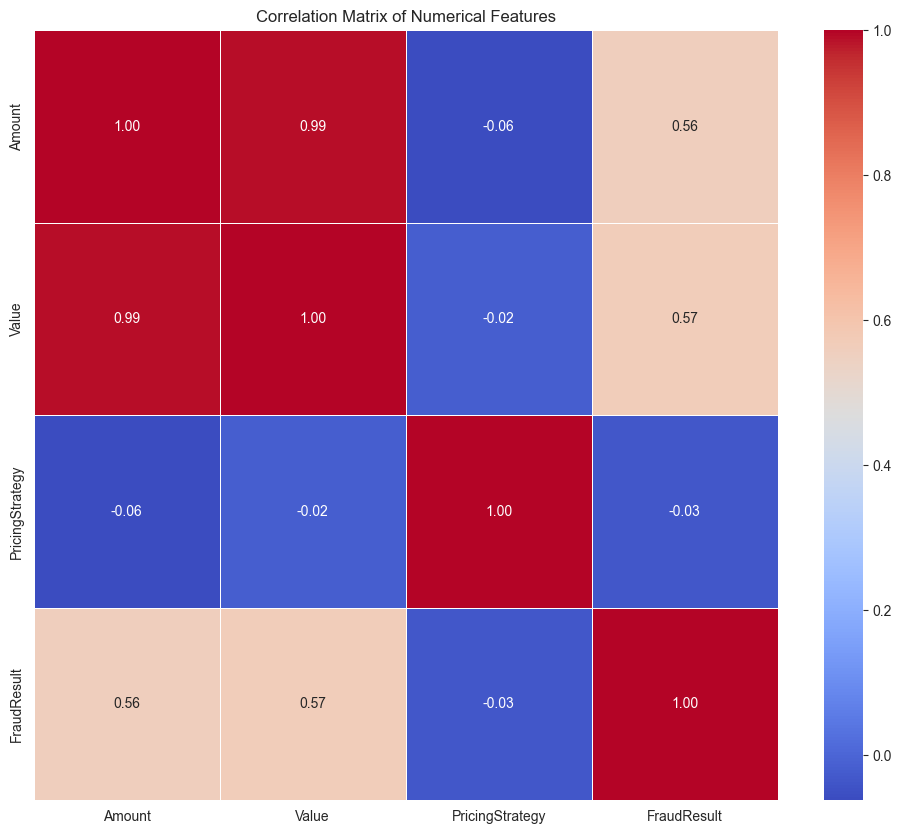

In [12]:
# This section investigates the linear relationships between numerical features using a correlation matrix and heatmap.

# Perform Correlation Analysis
print("\n--- Correlation Analysis of Numerical Features ---")

# Select only numerical columns for correlation calculation
# Exclude obvious IDs as they are not true numerical measures
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Define ID columns and other columns not suitable for direct correlation (e.g., CountryCode is an ID here)
cols_to_exclude_from_corr = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode']
actual_numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude_from_corr]

# Calculate the correlation matrix
correlation_matrix = df[actual_numerical_cols].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

6. Identifying Missing Values

In [13]:
# This section aims to precisely locate any missing values in the dataset and determine their extent,
# which will guide our strategy for handling them during preprocessing.

# Identify Missing Values
print("\n--- Missing Values Analysis ---")

# Count missing values for each column
missing_values = df.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage.sort_values(ascending=False))

# Identify columns with ANY missing values
cols_with_missing = missing_values[missing_values > 0].index.tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo missing values found in the dataset.")



--- Missing Values Analysis ---

Number of Missing Values per Column:
TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
TransactionStartTime_dt    0
dtype: int64

Percentage of Missing Values per Column:
TransactionId              0.0
BatchId                    0.0
AccountId                  0.0
SubscriptionId             0.0
CustomerId                 0.0
CurrencyCode               0.0
CountryCode                0.0
ProviderId                 0.0
ProductId                  0.0
ProductCategory            0.0
ChannelId                  0.0
Amount                     0.0
Value    

7. Outlier Detection


--- Outlier Detection using Box Plots ---


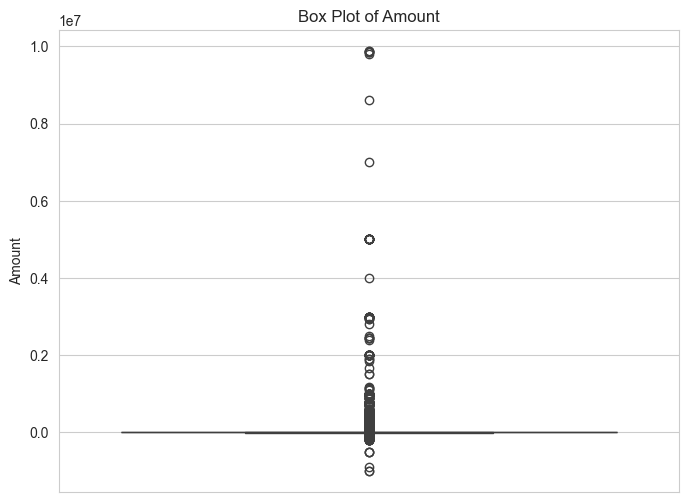

Number of outliers in 'Amount' (based on IQR): 24441
Percentage of outliers in 'Amount': 25.55%


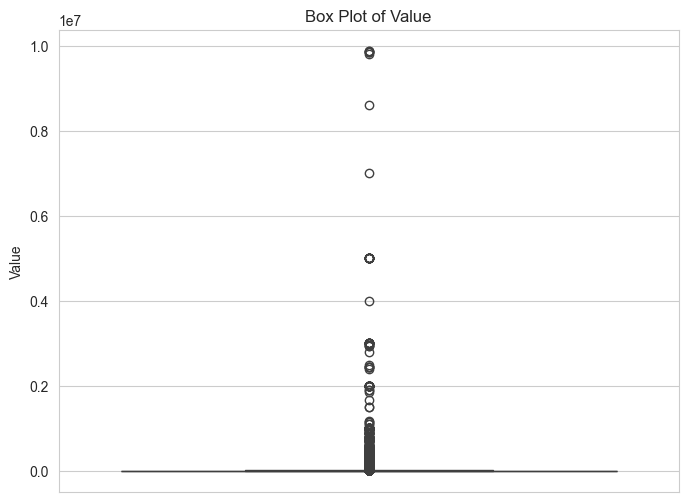

Number of outliers in 'Value' (based on IQR): 9021
Percentage of outliers in 'Value': 9.43%


In [14]:
# Box plots are utilized to visually identify extreme values (outliers) in numerical features.
# Outliers can significantly influence statistical measures and model performance.

# Perform Outlier Detection using Box Plots
print("\n--- Outlier Detection using Box Plots ---")

# List of numerical columns to check for outliers (focus on key financial metrics)
numerical_cols_for_outliers = ['Amount', 'Value']

for col in numerical_cols_for_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

    # Optional: Quantify outliers using IQR method for numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"Number of outliers in '{col}' (based on IQR): {outliers_count}")
    print(f"Percentage of outliers in '{col}': {outliers_count / len(df) * 100:.2f}%")


Final Summary Section
# ## EDA Summary: Top 3-5 Most Significant Insights for Credit Risk Model

# Based on the comprehensive exploratory data analysis, here are the top 3-5 most significant insights that will inform our next steps in building the credit risk model:

# 1.  **[YOUR FIRST KEY INSIGHT HERE]:**
#     * **Observation:** (Describe what you found from the EDA, e.g., "The `FraudResult` column is highly imbalanced, with only X% of transactions marked as fraudulent.")
#     * **Implication for Project:** (Explain why this insight is important for building the model, e.g., "This severe class imbalance necessitates the use of appropriate sampling techniques (e.g., SMOTE) and evaluation metrics (Precision, Recall, F1-score, ROC-AUC) beyond simple accuracy to effectively train and assess the model.")

# 2.  **[YOUR SECOND KEY INSIGHT HERE]:**
#     * **Observation:** (e.g., "Numerical features like `Amount` and `Value` exhibit extreme right-skewness and a significant number of outliers, indicating a long tail of very high transaction values.")
#     * **Implication for Project:** (e.g., "Feature scaling and potential transformations (e.g., logarithmic) will be crucial for these features to ensure that models sensitive to scale or outliers perform optimally. Further investigation into these high-value transactions may also provide valuable context.")

# 3.  **[YOUR THIRD KEY INSIGHT HERE]:**
#     * **Observation:** (e.g., "`TransactionStartTime` is currently an object type, but shows clear temporal patterns in transaction volume (e.g., specific peak hours/days).")
#     * **Implication for Project:** (e.g., "Extracting rich time-based features (e.g., hour of day, day of week, month, day of month) from `TransactionStartTime` will be essential for capturing behavioral patterns and enhancing the model's predictive power. Fraud patterns might also vary significantly across these time-based features.")

# 4.  **[YOUR FOURTH KEY INSIGHT HERE (Optional, but recommended for strong analysis)]:**
#     * **Observation:** (e.g., "Specific categorical features like `ChannelId` and `ProductCategory` exhibit distinct distributions for fraudulent transactions. For example, `[Specific Channel/Product]` seems to have a higher proportion of fraud.")
#     * **Implication for Project:** (e.g., "These features are likely strong predictors of fraud. Appropriate encoding strategies (e.g., One-Hot Encoding, Target Encoding, or Weight of Evidence) will be necessary to incorporate them effectively into the model. Further investigation into these high-risk categories could yield actionable business intelligence.")

# 5.  **[YOUR FIFTH KEY INSIGHT HERE (Optional)]:**
#     * **Observation:** (e.g., "The dataset contains no missing values, or only a very small percentage in specific columns.")
#     * **Implication for Project:** (e.g., "The absence of significant missing data simplifies the preprocessing stage, allowing us to focus on feature creation and transformation without extensive imputation strategies. If a small percentage of missing data was found, briefly mention your chosen strategy.")
